In [2]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import scipy.stats as scipy

In [3]:
dataset = pd.read_csv("Phishing_Legitimate_full.csv")
dataset[["PctExtHyperlinks", "PctExtResourceUrls", "PctNullSelfRedirectHyperlinks"]] = dataset[["PctExtHyperlinks", "PctExtResourceUrls", "PctNullSelfRedirectHyperlinks"]].apply(lambda x:x*1000)
dataset = dataset.astype("int")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   id                                  10000 non-null  int64
 1   NumDots                             10000 non-null  int64
 2   SubdomainLevel                      10000 non-null  int64
 3   PathLevel                           10000 non-null  int64
 4   UrlLength                           10000 non-null  int64
 5   NumDash                             10000 non-null  int64
 6   NumDashInHostname                   10000 non-null  int64
 7   AtSymbol                            10000 non-null  int64
 8   TildeSymbol                         10000 non-null  int64
 9   NumUnderscore                       10000 non-null  int64
 10  NumPercent                          10000 non-null  int64
 11  NumQueryComponents                  10000 non-null  int64
 12  NumAm

In [4]:
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
X = dataset.drop("CLASS_LABEL", axis=1)
X = X.drop("id", axis=1)
y = pd.DataFrame(dataset["CLASS_LABEL"])
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [14]:
feature_names = X.columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [15]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


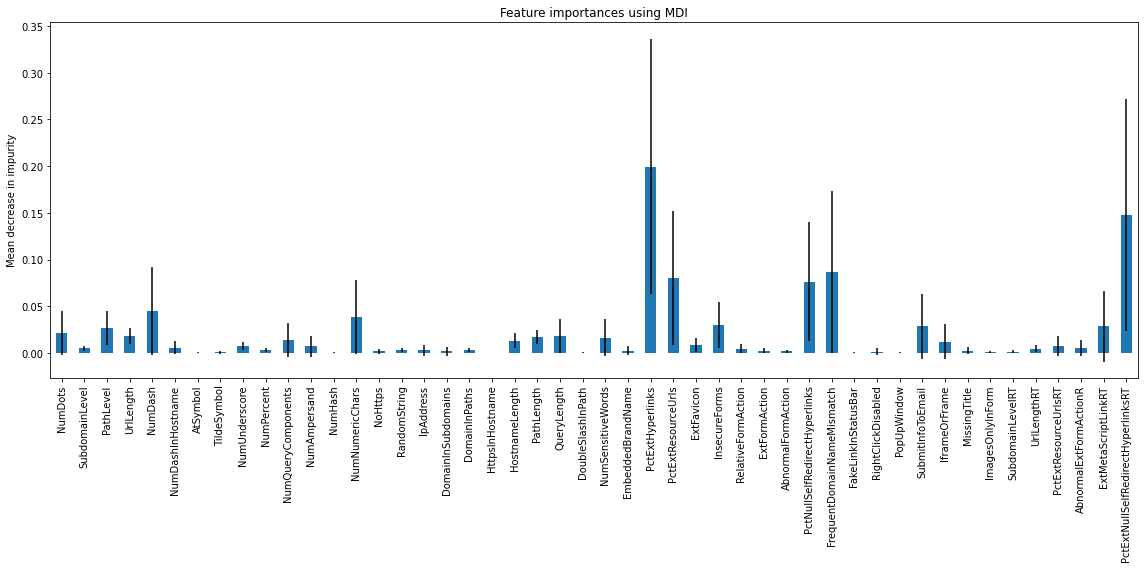

In [16]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [17]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 8.770 seconds


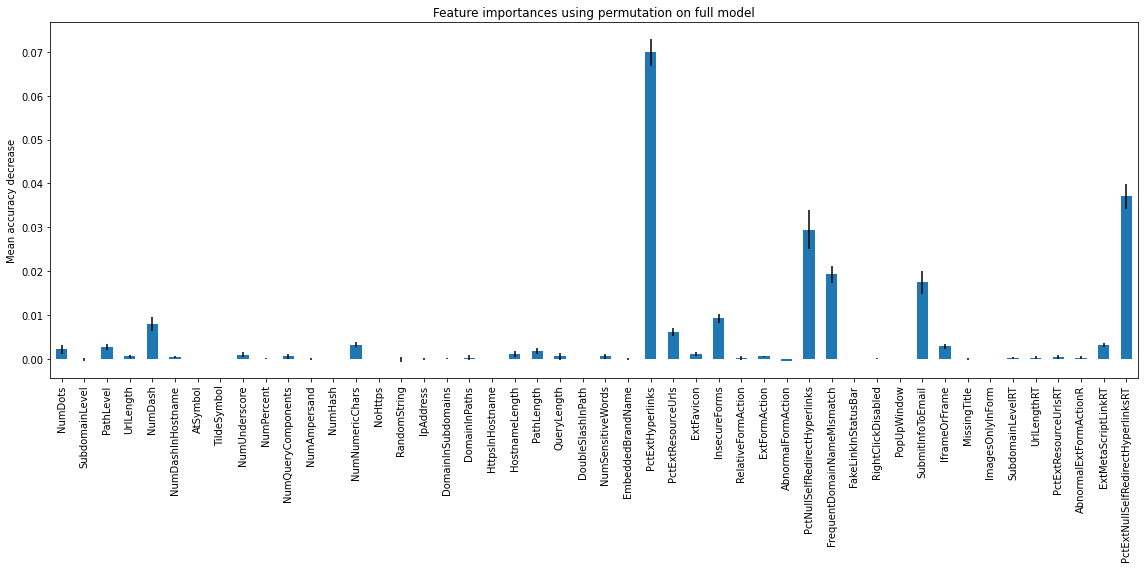

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [26]:
feature_names = X.columns
entropy_values = []
for f in feature_names:
    count = np.unique(X[f])
    entropy_values.append(scipy.entropy(count))

/home/luis/.local/lib/python3.10/site-packages/scipy/stats/_entropy.py:77: RuntimeWarning: divide by zero encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


In [28]:
e_s = sorted(entropy_values, reverse=True)
for i in e_s[:10]:
    value = entropy_values.index(i)
    print(feature_names[value])

HttpsInHostname
PctExtResourceUrls
PctExtHyperlinks
PctNullSelfRedirectHyperlinks
UrlLength
QueryLength
PathLength
NumNumericChars
HostnameLength
NumDash
